In [298]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import math
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [227]:
df = pd.read_csv('processed_data/all_data.csv')
df.head()

,CPF,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,atributo-Pensamento criativo,...,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos,Área,AveragePerformance,ModePerformance
0,678.042.935-18,53.65,65.70,37.65,56.75,32.33,59.67,49.44,63.08,56.26,...,41.95,55.59,78.32,60.14,41.95,8.74,55.59,Operações,2.50,2.0
1,089.324.175-12,NaN,60.78,NaN,NaN,35.13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Logística,2.00,2.0
2,587.416.093-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financeiro,2.00,2.0
3,375.410.982-13,22.46,15.71,5.67,56.75,23.36,11.43,18.25,13.14,16.54,...,32.86,46.50,46.50,32.86,51.05,32.86,41.95,Operações,2.75,3.0
4,652.134.809-42,NaN,56.15,NaN,NaN,62.03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pessoas,1.75,1.0


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269 entries, 0 to 2268
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CPF                                  2269 non-null   object 
 1   Potencial Bruto                      506 non-null    float64
 2   Raciocínio                           1703 non-null   float64
 3   Social                               533 non-null    float64
 4   Motivacional                         524 non-null    float64
 5   Cultura pontuação                    1753 non-null   float64
 6   atributo-Capacidade analítica        500 non-null    float64
 7   atributo-Pensamento conceitual       500 non-null    float64
 8   atributo-Reflexão                    500 non-null    float64
 9   atributo-Pensamento criativo         500 non-null    float64
 10  atributo-Planejamento e organização  500 non-null    float64
 11  atributo-Comunicação          

In [26]:
df.columns

Index(['CPF', 'Potencial Bruto', 'Raciocínio', 'Social', 'Motivacional',
       'Cultura pontuação', 'atributo-Capacidade analítica',
       'atributo-Pensamento conceitual', 'atributo-Reflexão',
       'atributo-Pensamento criativo', 'atributo-Planejamento e organização',
       'atributo-Comunicação', 'atributo-Consideração pelos outros',
       'atributo-Influência', 'atributo-Sociabilidade', 'atributo-Facilitação',
       'atributo-Flexibilidade', 'atributo-Estabilidade emocional',
       'atributo-Ambição', 'atributo-Iniciativa', 'atributo-Assertividade',
       'atributo-Tomada de riscos', 'perfil-Capacidade analítica',
       'perfil-Pensamento conceitual', 'perfil-Reflexão',
       'perfil-Pensamento criativo', 'perfil-Planejamento e organização',
       'perfil-Comunicação', 'perfil-Consideração pelos outros',
       'perfil-Influência', 'perfil-Sociabilidade', 'perfil-Facilitação',
       'perfil-Flexibilidade', 'perfil-Estabilidade emocional',
       'perfil-Ambição', 'perfi

In [329]:


def SpecCluster(X,n_cluster_list=[2,10,15,20,30,50]):
    for n_cluster in n_cluster_list:
        spec_c = SpectralClustering(n_clusters=n_cluster,eigen_solver='arpack',n_init=10,
                        assign_labels='kmeans',random_state=0).fit(X)
        score = silhouette_score(X, spec_c.labels_, metric='euclidean')

        unique, counts = np.unique(spec_c.labels_, return_counts=True)

        print('Finished n_cluster = ',n_cluster,'. Number of points on clusters:',counts,'. Score:',round(score,2))

    return

def DBSCANCluster(X,min_samples_list = [50,100,200],eps_list = [1,1.005,1.01,1.02,1.03,1.04,1.05,1.09,1.1]):
    for min_samples in min_samples_list:
        for eps in eps_list:
            db = DBSCAN(min_samples = min_samples,eps=eps).fit(X)
            try:
                silhou = silhouette_score(X, db.labels_, metric='euclidean')
                calins = calinski_harabasz_score(X, db.labels_)
                if len([x for x in set(db.labels_) if x >=0]) > 2 and silhou > 0:
                    print('Params {0}-{1} has {2} clusters and scores silouh = {3} and calins = {4}'.format(min_samples,eps,len([x for x in set(db.labels_) if x >=0]),round(silhou,2),round(calins,0)))
            except:
                print('Params {0}-{1} has {2} clusters'.format(min_samples,eps,len([x for x in set(db.labels_) if x >=0])))

    return

def clusters_metrics(X):
    all = {'Cluster':[],'Área':[],'AvgPerformanceDist':[]}
    labels,areas,number,means,stds,per25,per50,per75= [],[],[],[],[],[],[],[]
    for label in sorted(X['labels'].unique()):
        X_this_label = X[X['labels']==label]
        for area in X_this_label['Área'].unique():
            X_this_label_each_area = X_this_label[X_this_label['Área'] == area]
            labels.append(label)
            areas.append(area)
            number.append(len(X_this_label_each_area))
            means.append(round(np.mean(X_this_label_each_area['AveragePerformance']),1))
            stds.append(round(np.std(X_this_label_each_area['AveragePerformance']),1))
            per25.append(round(np.nanpercentile(X_this_label_each_area['AveragePerformance'],25),1))
            per50.append(round(np.nanpercentile(X_this_label_each_area['AveragePerformance'],50),1))
            per75.append(round(np.nanpercentile(X_this_label_each_area['AveragePerformance'],75),1))
            all['Cluster'].extend([str(label)]*len(X_this_label_each_area['AveragePerformance']))
            all['Área'].extend([area]*len(X_this_label_each_area['AveragePerformance']))
            all['AvgPerformanceDist'].extend(X_this_label_each_area['AveragePerformance'])

    # pd.DataFrame({'Cluster':labels,'Área':areas,'Number':number,'Mean':means,
    # 'Std':stds,'25Percentil':per25,'50Percentil':per50,'75Percentil':per75}), 
    df_results = pd.DataFrame(all)
    sns.boxplot(y=df_results['AvgPerformanceDist'],x=df_results['Cluster'],hue=df_results['Área'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    return 
    

### Just main variables with KNN imputation

In [277]:
%%capture
X = df[['Raciocínio','Social','Motivacional','Cultura pontuação']]
X[:] = KNNImputer(missing_values=np.nan,n_neighbors = 5,add_indicator=False).fit_transform(X)
X[:] = StandardScaler().fit_transform(X)

In [278]:
DBSCANCluster(X,min_samples_list = [5,7,8,10,50],eps_list = [0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.7,0.8,1,1.1])

Params 5-0.7 has 3 clusters and scores silouh = 0.05 and calins = 8.0
Params 7-0.7 has 3 clusters and scores silouh = 0.09 and calins = 9.0
Params 8-0.6 has 3 clusters and scores silouh = 0.02 and calins = 14.0
Params 10-0.6 has 3 clusters and scores silouh = 0.01 and calins = 18.0
Params 10-0.7 has 3 clusters and scores silouh = 0.04 and calins = 14.0


In [279]:
SpecCluster(X,n_cluster_list=[2,3,4,5,6,7,8,9,10,15])

Finished n_cluster =  2 . Number of points on clusters: [1927  342] . Score: 0.31
Finished n_cluster =  3 . Number of points on clusters: [ 310 1767  192] . Score: 0.27
Finished n_cluster =  4 . Number of points on clusters: [2033    5  227    4] . Score: 0.31
Finished n_cluster =  5 . Number of points on clusters: [   4    2 2257    5    1] . Score: 0.31
Finished n_cluster =  6 . Number of points on clusters: [2219    2    7   16   24    1] . Score: 0.3
Finished n_cluster =  7 . Number of points on clusters: [  22    7    1 2215   16    2    6] . Score: 0.29
Finished n_cluster =  8 . Number of points on clusters: [2217    4    2   16    5    3    1   21] . Score: 0.28
Finished n_cluster =  9 . Number of points on clusters: [  44    2    3   13    8 2177   17    1    4] . Score: 0.28
Finished n_cluster =  10 . Number of points on clusters: [  31    2    2    7    8    5 2183    5   16   10] . Score: 0.24
Finished n_cluster =  15 . Number of points on clusters: [  17    2    7    2    5

In [332]:
%%capture
spec_c_choice = SpectralClustering(n_clusters=3,eigen_solver='arpack',n_init=10,
                        assign_labels='kmeans',random_state=0).fit(X)
X['labels'] = spec_c_choice.labels_
for cluster_label in sorted(X['labels'].unique()):
    print(len(X[X['labels'] == cluster_label]),cluster_label)

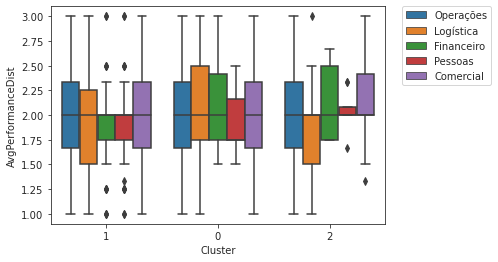

In [326]:
clusters_metrics(X.join(df[['Área','AveragePerformance']]))

#### Nested clustering: do cluster inside the big cluster

In [323]:
%%capture
X_nested = X[X['labels'] == 1]
X_nested[:] = StandardScaler().fit_transform(X_nested)

In [324]:
SpecCluster(X_nested,n_cluster_list=[2,3,4,5,6,7,8,9,10])

Finished n_cluster =  2 . Number of points on clusters: [1303  464] . Score: 0.28
Finished n_cluster =  3 . Number of points on clusters: [ 401 1110  256] . Score: 0.26
Finished n_cluster =  4 . Number of points on clusters: [989 257 140 381] . Score: 0.26
Finished n_cluster =  5 . Number of points on clusters: [ 132 1024  117  224  270] . Score: 0.28
Finished n_cluster =  6 . Number of points on clusters: [  18 1232   90  173  131  123] . Score: 0.25
Finished n_cluster =  7 . Number of points on clusters: [  56 1276   92   15  121  130   77] . Score: 0.23
Finished n_cluster =  8 . Number of points on clusters: [ 116 1310   45   72   17  125   79    3] . Score: 0.22
Finished n_cluster =  9 . Number of points on clusters: [  73   70   46   14  125    6 1278   63   92] . Score: 0.23
Finished n_cluster =  10 . Number of points on clusters: [  80    3 1353    6   11   61   71   16  126   40] . Score: 0.21


In [333]:
%%capture
spec_c_choice = SpectralClustering(n_clusters=4,eigen_solver='arpack',n_init=10,
                        assign_labels='kmeans',random_state=0).fit(X_nested)
X_nested['labels'] = spec_c_choice.labels_
for cluster_label in sorted(X_nested['labels'].unique()):
    print(len(X_nested[X_nested['labels'] == cluster_label]),cluster_label)

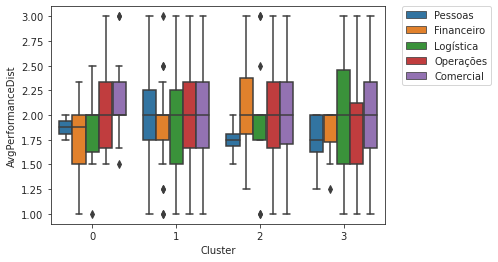

In [334]:
clusters_metrics(X_nested.join(df[['Área','AveragePerformance']]))

In [330]:
X_nested_nested = X_nested[X_nested['labels'] == 3]
X_nested_nested[:] = StandardScaler().fit_transform(X_nested_nested)

In [ ]:
spec_c_choice = SpectralClustering(n_clusters=4, assign_labels='discretize',random_state=0).fit(X_nested_nested)
X_nested['labels'] = spec_c_choice.labels_

In [331]:
SpecCluster(X_nested_nested,n_cluster_list=[2,3,4,5,6,7,8,9,10,15])

Finished n_cluster =  2 . Number of points on clusters: [286 114] . Score: 0.33
Finished n_cluster =  3 . Number of points on clusters: [250  88  62] . Score: 0.24
Finished n_cluster =  4 . Number of points on clusters: [ 77 235  61  27] . Score: 0.24
Finished n_cluster =  5 . Number of points on clusters: [ 17 228  19  61  75] . Score: 0.22
Finished n_cluster =  6 . Number of points on clusters: [183  17  15  80  54  51] . Score: 0.24
Finished n_cluster =  7 . Number of points on clusters: [194  17  15  53  19  70  32] . Score: 0.23
Finished n_cluster =  8 . Number of points on clusters: [ 46  38  17 184  14  52  33  16] . Score: 0.23
Finished n_cluster =  9 . Number of points on clusters: [ 16  43 224  10  50   3  19   7  28] . Score: 0.18
Finished n_cluster =  10 . Number of points on clusters: [ 88 131  16   7  10  16   3  43  44  42] . Score: 0.23
Finished n_cluster =  15 . Number of points on clusters: [64 33 97  3  3 42  7 30 10 16 16 24 14 27 14] . Score: 0.23


In [ ]:
clusters_metrics(X_nested.join(df[['Área','AveragePerformance']]))

### Big number of variables, just rows without Nan

In [237]:
features_atributo = ['atributo-Capacidade analítica',
       'atributo-Pensamento conceitual', 'atributo-Reflexão',
       'atributo-Pensamento criativo', 'atributo-Planejamento e organização',
       'atributo-Comunicação', 'atributo-Consideração pelos outros',
       'atributo-Influência', 'atributo-Sociabilidade', 'atributo-Facilitação',
       'atributo-Flexibilidade', 'atributo-Estabilidade emocional',
       'atributo-Ambição', 'atributo-Iniciativa', 'atributo-Assertividade',
       'atributo-Tomada de riscos','Área','AveragePerformance']

features_perfil = ['perfil-Capacidade analítica',
       'perfil-Pensamento conceitual', 'perfil-Reflexão',
       'perfil-Pensamento criativo', 'perfil-Planejamento e organização',
       'perfil-Comunicação', 'perfil-Consideração pelos outros',
       'perfil-Influência', 'perfil-Sociabilidade', 'perfil-Facilitação',
       'perfil-Flexibilidade', 'perfil-Estabilidade emocional',
       'perfil-Ambição', 'perfil-Iniciativa', 'perfil-Assertividade',
       'perfil-Tomada de riscos','Área','AveragePerformance']



In [231]:
df[features_perfil]

,perfil-Capacidade analítica,perfil-Pensamento conceitual,perfil-Reflexão,perfil-Pensamento criativo,perfil-Planejamento e organização,perfil-Comunicação,perfil-Consideração pelos outros,perfil-Influência,perfil-Sociabilidade,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos
0,41.95,28.32,46.50,37.41,32.86,78.32,60.14,19.23,23.77,41.95,55.59,78.32,60.14,41.95,8.74,55.59
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32.86,51.05,37.41,46.50,78.32,78.32,37.41,73.77,91.86,32.86,46.50,46.50,32.86,51.05,32.86,41.95
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,64.68,60.14,46.50,55.59,64.68,28.32,46.50,78.32,69.23,37.41,28.32,73.77,69.23,37.41,37.41,37.41
2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2267,37.41,51.05,69.23,32.86,60.14,23.77,46.50,41.95,64.68,46.50,55.59,51.05,78.32,73.77,46.50,28.32


In [240]:
@ignore_warnings(category=ConvergenceWarning)

def cluster_group(df,features,nan='drop',cluster='spec',n_cluster_list=[2,3,4,5,6,7,8,9,10,25,50],
                        min_samples_list = [5,10,20],eps_list = [0.1,0.5,1],
                        choose = 0):
    
    X = df[features]

    if nan == 'drop':
        X = X.dropna(axis=0,how='any')
    elif nan == 'KNNinputer':
        X[:] = KNNImputer(missing_values=np.nan,n_neighbors = 3,add_indicator=False).fit_transform(X)
    
    y = df[['Área','AveragePerformance']]
    
    X = X.drop(['Área','AveragePerformance'],axis=1)
    X[:] = StandardScaler().fit_transform(X)

    if choose == 0:
        if cluster == 'spec':
            SpecCluster(X,n_cluster_list)
        elif cluster == 'dbscan':
            DBSCANCluster(X,min_samples_list,eps_list)
    else:
        spec_c = SpectralClustering(n_clusters=choose,eigen_solver='arpack',n_init=10,
                assign_labels='kmeans',random_state=0).fit(X)
        score = silhouette_score(X, spec_c.labels_, metric='euclidean')

        unique, counts = np.unique(spec_c.labels_, return_counts=True)
        return X,y, spec_c

In [241]:
cluster_group(df,features_perfil,nan='drop',cluster='spec')

Finished n_cluster =  2 . Number of points on clusters: [365  12] . Score: 0.07
Finished n_cluster =  3 . Number of points on clusters: [362  12   3] . Score: -0.03
Finished n_cluster =  4 . Number of points on clusters: [360  12   2   3] . Score: -0.07
Finished n_cluster =  5 . Number of points on clusters: [309  11   2  52   3] . Score: -0.07
Finished n_cluster =  6 . Number of points on clusters: [308   3  49  12   2   3] . Score: -0.06
Finished n_cluster =  7 . Number of points on clusters: [ 48   2   3   2 307  12   3] . Score: -0.08
Finished n_cluster =  8 . Number of points on clusters: [115   2  44   2 196   3  12   3] . Score: -0.07
Finished n_cluster =  9 . Number of points on clusters: [301   2  44   3   3   8   2  11   3] . Score: -0.11
Finished n_cluster =  10 . Number of points on clusters: [217   2   3   3  94   2  15   8  30   3] . Score: -0.09
Finished n_cluster =  25 . Number of points on clusters: [ 17   2   3   6   3   2   9  29   3  34  12   2  32   3   2   3  12  

In [242]:
cluster_group(df,features_atributo,nan='drop',cluster='spec')

Finished n_cluster =  2 . Number of points on clusters: [323  22] . Score: 0.18
Finished n_cluster =  3 . Number of points on clusters: [257  22  66] . Score: 0.11
Finished n_cluster =  4 . Number of points on clusters: [226  61  22  36] . Score: 0.1
Finished n_cluster =  5 . Number of points on clusters: [121 184  22  13   5] . Score: 0.07
Finished n_cluster =  6 . Number of points on clusters: [123 163  22  13   5  19] . Score: 0.06
Finished n_cluster =  7 . Number of points on clusters: [144  12  44  21 100  19   5] . Score: 0.07
Finished n_cluster =  8 . Number of points on clusters: [116  19  27  32 123  19   5   4] . Score: 0.06
Finished n_cluster =  9 . Number of points on clusters: [ 26 146   5   4 117   7  21   4  15] . Score: 0.03
Finished n_cluster =  10 . Number of points on clusters: [152  25   4 101   6  21   5  15   4  12] . Score: 0.01
Finished n_cluster =  25 . Number of points on clusters: [15 83 13  4  2 16  4  7 11 22  9 13 34 18 16  6  3  5 41  4  3  5  2  7
  2] .

In [246]:
X_group, y_area_per, cluster_results = cluster_group(df,features_atributo,nan='drop',cluster='spec',choose=5)
X_group['labels'] = cluster_results.labels_
X_group = X_group.join(y_area_per)
X_group.head()

,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,atributo-Pensamento criativo,atributo-Planejamento e organização,atributo-Comunicação,atributo-Consideração pelos outros,atributo-Influência,atributo-Sociabilidade,atributo-Facilitação,atributo-Flexibilidade,atributo-Estabilidade emocional,atributo-Ambição,atributo-Iniciativa,atributo-Assertividade,atributo-Tomada de riscos,labels,Área,AveragePerformance
0,0.138432,-0.033301,0.897219,0.356564,-0.015900,0.353034,-0.185799,-1.686369,-1.608824,-0.808666,-0.319517,0.983690,0.446724,-0.168823,-1.189618,0.651061,1,Operações,2.50
3,-1.994434,-1.505928,-1.558059,-1.499166,-0.806642,-1.134401,-1.960244,-1.386567,-0.592468,-1.951700,-1.808362,-0.087654,-0.476498,0.156283,-0.202589,0.165404,2,Operações,2.75
7,0.942236,0.503059,-0.387942,1.495138,0.209884,0.626986,0.908959,-0.710685,0.389003,1.003595,0.303903,1.145334,0.219303,1.546804,-0.609950,0.573679,0,Financeiro,2.50
8,-1.511179,-1.769859,-1.104761,-0.908622,-1.532235,-1.877188,-2.069624,-2.322181,-2.068918,-1.591697,-1.836833,0.670279,0.285183,-0.501557,-1.033238,-0.327848,2,Pessoas,2.50
9,-1.191514,-0.648509,-0.414000,-1.431889,-0.324737,-0.264638,-0.657711,-1.306910,-1.157687,-1.102019,-0.637118,1.071247,0.380393,1.061528,0.713972,1.390702,1,Logística,1.75


In [283]:
results = clusters_metrics(X_group)

In [284]:
results

,Cluster,Área,Number,Mean,Std
0,1,Operações,68,2.0,0.4
1,1,Logística,18,2.0,0.5
2,1,Financeiro,15,2.1,0.5
3,1,Pessoas,9,1.7,0.3
4,1,Comercial,74,2.1,0.4
5,2,Operações,9,2.0,0.5
6,2,Pessoas,2,2.0,0.5
7,2,Comercial,8,2.0,0.4
8,2,Logística,3,1.9,0.1
9,0,Financeiro,11,2.1,0.5


### Cluster on pairs of the main metrics, Nan are imputed, with Threshold performance

In [151]:
from multiprocessing.heap import Arena


def cluster_couple(df,feature_1,feature_2,choose_cluster = 0,nan='input'):
    if nan == 'drop':
        X = df[[feature_1, feature_2,'Área']].dropna(axis=0,how='any')
        df_area = df['Área']
        X = X.drop(['Área'],axis=1)
    elif nan == 'input':
        X = df[[feature_1, feature_2]]
        X[:] = KNNImputer(missing_values=np.nan,n_neighbors = 3,add_indicator=False).fit_transform(X)
        df_area = df['Área']

    X[:] = StandardScaler().fit_transform(X)
    SpecCluster(X,n_cluster_list=[2,3,4,5,6,10])

    if choose_cluster > 0:
        spec_c_choice = SpectralClustering(n_clusters=choose_cluster, assign_labels='discretize',random_state=0).fit(X)
        X['labels'] = spec_c_choice.labels_
        sns.scatterplot(data=X, x=feature_1, y=feature_2, hue=X['labels'],style=df_area, s=200, palette=sns.color_palette("hls", choose_cluster))       
        plt.xlabel(feature_1)
        plt.ylabel(feature_2)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    else:
        return 

'Potencial Bruto', 'Social', 'Raciocínio',  'Motivacional',
       'Cultura pontuação',

In [159]:
threshold_performance = 2.6
df = df[df['AveragePerformance'] >= threshold_performance]

Finished n_cluster =  2 . Number of points on clusters: [10 65] . Score: 0.55
Finished n_cluster =  3 . Number of points on clusters: [10 55 10] . Score: 0.49
Finished n_cluster =  4 . Number of points on clusters: [10 48 10  7] . Score: 0.44
Finished n_cluster =  5 . Number of points on clusters: [48 10  7  4  6] . Score: 0.4
Finished n_cluster =  6 . Number of points on clusters: [48 10  4  2  4  7] . Score: 0.43
Finished n_cluster =  10 . Number of points on clusters: [ 8  2  9 40  3  2  2  5  1  3] . Score: 0.42


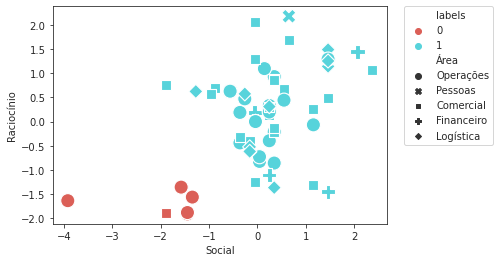

In [160]:
cluster_couple(df,'Social','Raciocínio',choose_cluster = 2,nan='input')

Finished n_cluster =  2 . Number of points on clusters: [239   2] . Score: 0.78
Finished n_cluster =  3 . Number of points on clusters: [237   2   2] . Score: 0.76
Finished n_cluster =  4 . Number of points on clusters: [231   2   2   6] . Score: 0.75
Finished n_cluster =  5 . Number of points on clusters: [222   2   2   6   9] . Score: 0.74
Finished n_cluster =  6 . Number of points on clusters: [218   2   2   6   4   9] . Score: 0.75
Finished n_cluster =  10 . Number of points on clusters: [216   2   2   1   5   2   1   3   3   6] . Score: 0.72


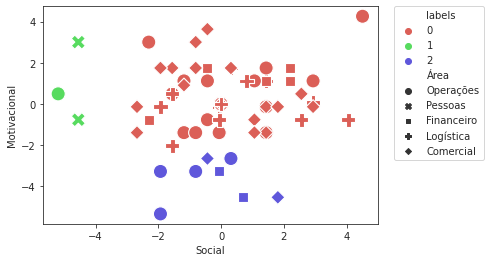

In [153]:
cluster_couple(df,'Social','Motivacional',choose_cluster = 3)

Finished n_cluster =  2 . Number of points on clusters: [185  56] . Score: 0.43
Finished n_cluster =  3 . Number of points on clusters: [ 37 184  20] . Score: 0.38
Finished n_cluster =  4 . Number of points on clusters: [ 37 169  20  15] . Score: 0.38
Finished n_cluster =  5 . Number of points on clusters: [ 17   5  15 170  34] . Score: 0.35
Finished n_cluster =  6 . Number of points on clusters: [170   3   2  34  15  17] . Score: 0.36
Finished n_cluster =  10 . Number of points on clusters: [  2 150   2   2   1  12  15  25  24   8] . Score: 0.34


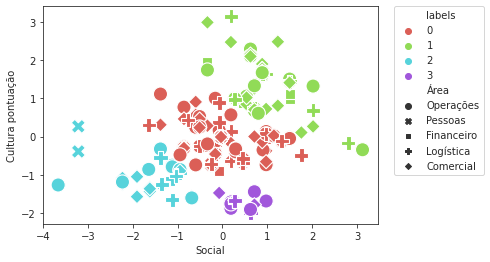

In [155]:
cluster_couple(df,'Social','Cultura pontuação',choose_cluster = 4)

Finished n_cluster =  2 . Number of points on clusters: [238   3] . Score: 0.54
Finished n_cluster =  3 . Number of points on clusters: [209   3  29] . Score: 0.42
Finished n_cluster =  4 . Number of points on clusters: [174   3  25  39] . Score: 0.42
Finished n_cluster =  5 . Number of points on clusters: [ 28   3 157  25  28] . Score: 0.41
Finished n_cluster =  6 . Number of points on clusters: [ 23   3  33 152   6  24] . Score: 0.35
Finished n_cluster =  10 . Number of points on clusters: [ 3 95  5 17 33  2 22 23 17 24] . Score: 0.45


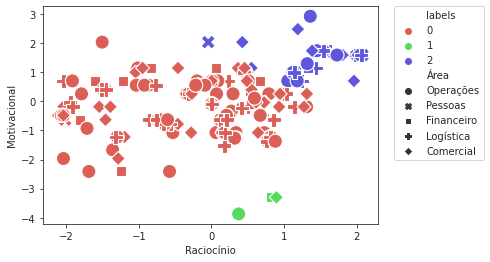

In [156]:
cluster_couple(df,'Raciocínio','Motivacional',choose_cluster = 3)

Finished n_cluster =  2 . Number of points on clusters: [194  47] . Score: 0.39
Finished n_cluster =  3 . Number of points on clusters: [ 28 176  37] . Score: 0.35
Finished n_cluster =  4 . Number of points on clusters: [ 67  30  20 124] . Score: 0.3
Finished n_cluster =  5 . Number of points on clusters: [ 22 128   2  17  72] . Score: 0.25
Finished n_cluster =  6 . Number of points on clusters: [ 24 152   2  19  12  32] . Score: 0.23
Finished n_cluster =  10 . Number of points on clusters: [ 16 136   2   5  14  11  19  21  14   3] . Score: 0.27


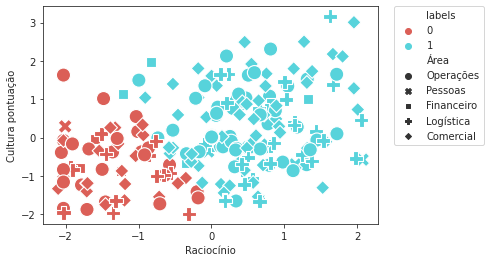

In [157]:
cluster_couple(df,'Raciocínio','Cultura pontuação',choose_cluster = 2)

Finished n_cluster =  2 . Number of points on clusters: [238   3] . Score: 0.6
Finished n_cluster =  3 . Number of points on clusters: [237   3   1] . Score: 0.45
Finished n_cluster =  4 . Number of points on clusters: [ 34   3 203   1] . Score: 0.4
Finished n_cluster =  5 . Number of points on clusters: [ 32   3 201   4   1] . Score: 0.39
Finished n_cluster =  6 . Number of points on clusters: [ 27   3 203   3   4   1] . Score: 0.36
Finished n_cluster =  10 . Number of points on clusters: [  3 171   3   3   4   1   9  30   1  16] . Score: 0.3


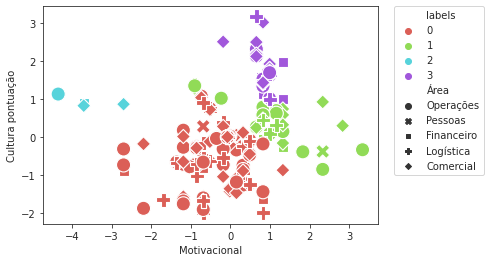

In [158]:
cluster_couple(df,'Motivacional','Cultura pontuação',choose_cluster = 4)